In [1]:
import datetime as dt
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
from arch import arch_model
import cufflinks as cf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
cf.go_offline()

%matplotlib inline

In [140]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,1,8)
data = web.DataReader("GOOG",'yahoo',start,end)

In [141]:
data.tail(50)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-25,1110.979980,1069.550049,1071.790039,1095.569946,2545800.0,1095.569946
2018-10-26,1106.530029,1034.089966,1037.030029,1071.469971,4187600.0,1071.469971
2018-10-29,1097.040039,995.830017,1082.469971,1020.080017,3880700.0,1020.080017
2018-10-30,1037.489990,1000.750000,1008.460022,1036.209961,3212700.0,1036.209961
2018-10-31,1091.939941,1057.000000,1059.810059,1076.770020,2529800.0,1076.770020
2018-11-01,1083.974976,1062.459961,1075.800049,1070.000000,1482000.0,1070.000000
2018-11-02,1082.974976,1054.609985,1073.729980,1057.790039,1839000.0,1057.790039
2018-11-05,1058.469971,1021.239990,1055.000000,1040.089966,2441400.0,1040.089966
2018-11-06,1064.344971,1038.069946,1039.479980,1055.810059,1233300.0,1055.810059


In [317]:
data['mvg_27'] = data['Close'].rolling(27).mean()  
data['mvg_7'] = data['Close'].rolling(7).mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



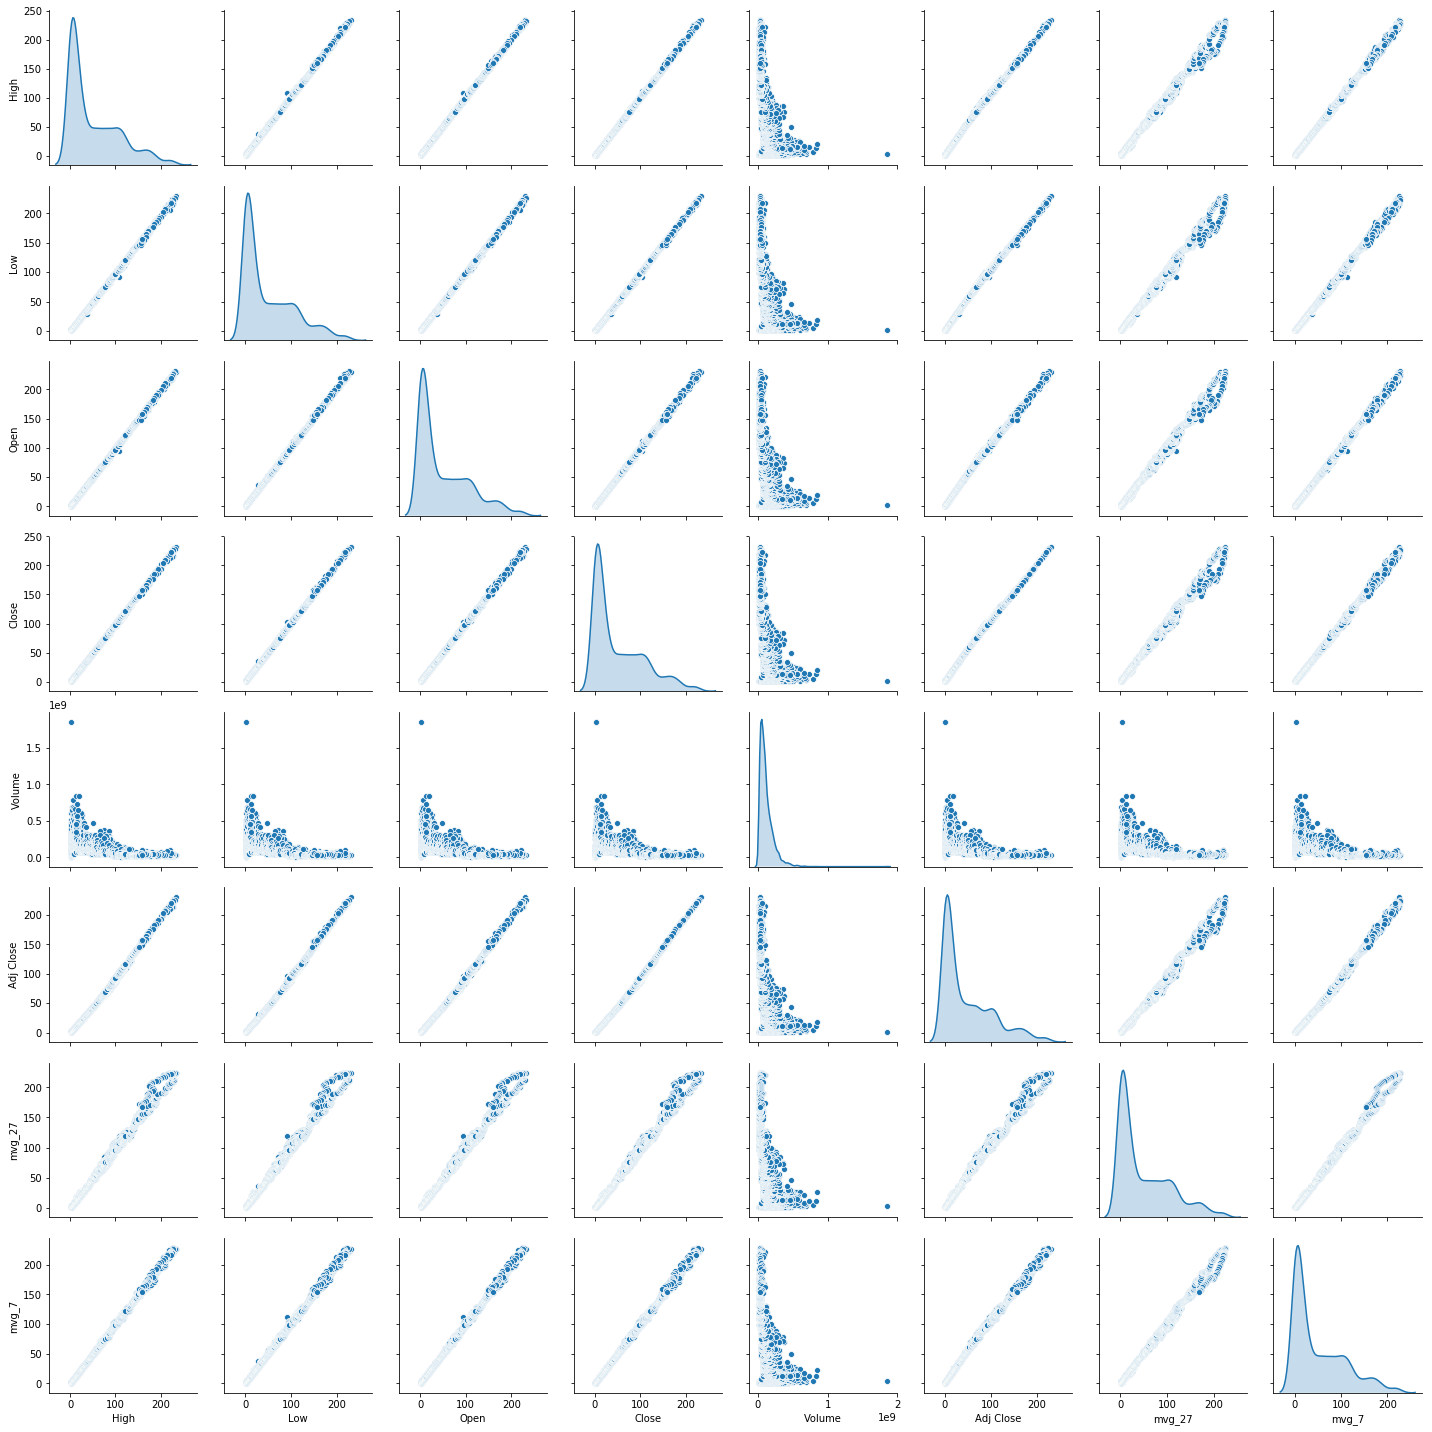

In [205]:
sns.pairplot(data,diag_kind="kde")

data[['Close','mvg_27','mvg_7']].iplot()

data['Volume'].iplot()

returns = 100 * data['Close'].pct_change().dropna()
am = arch_model(returns)

res = am.fit()

print(res.summary())

fig = res.plot(annualize='D')

plt.rcParams['figure.figsize'] = (16, 8)

plt.ylabel("Esperance du rendement")
plt.xlabel("Risque (ecart-type)")

#### Ratio de sharp

E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20

a = (E_r_p - r_f) / sigma_p
b = r_f
sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)
E_r_p_list = [a * x + b for x in sigma_p_list]

sigma_p_list

plt.plot(sigma_p_list, E_r_p_list)
plt.plot([0, sigma_p], [r_f, E_r_p], 'ro')

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20
U = r_f
sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)

for A_n in np.arange(0, 10, 2):
    A_n_list = [U + A_n * x ** (2) for x in sigma_p_list]
    plt.plot(sigma_p_list, A_n_list, label=A_n)

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')
plt.legend()

## ARIMA

In [4]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.statespace.SARIMAX(data['Close'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

results.resid.plot()

results.resid.plot(kind='kde')

data['forecast'] = results.predict(start = 4350, end= 4600, dynamic= True)  
data[['Close','forecast']].plot(figsize=(12,8))

model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

model_fit.resid.plot()



## Test Unitaire

In [4]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

from math import sqrt
from sklearn.metrics import mean_squared_error

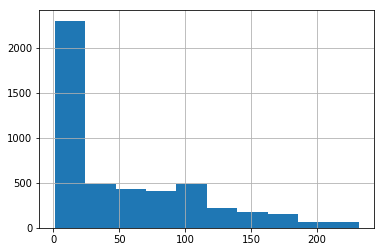

In [5]:
data['Close'].hist()

In [6]:
# create Difference

def difference(dataset):
    diff = list()
    for i in range(1,len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)


In [7]:
# Difference data

series = data['Close']
X = series.values

stationary = difference(X)
stationary.index = data.index[1:]

In [8]:
# Check if Stationary

result = adfuller(stationary)
print("ADF Statistic : ",result[0])
print("p-value : ",result[1])
print("Critical values :")
for key, value in result[4].items():
    print("\t%s : %.3f" %(key,value))


ADF Statistic :  -10.483024345492193
p-value :  1.199999658663426e-18
Critical values :
	1% : -3.432
	5% : -2.862
	10% : -2.567


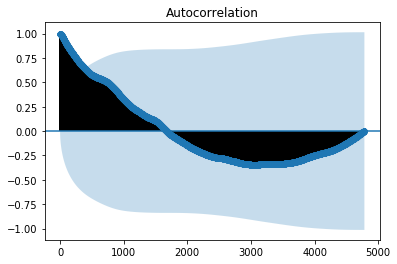

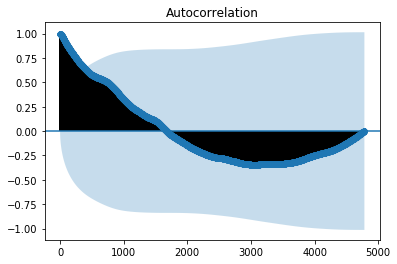

In [9]:
# ACF et PACF

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_acf(series, ax=pyplot.gca())
#plot_pacf(series, ax=pyplot.gca())

#### (p,d,q)
- AR I MA
- p < 12
- d < 2
- q < 12


In [153]:
train_size = int(len(data)* 0.97)
train = data['Close'][:train_size]
test = data['Close'][train_size:]
model_fit_list=[]
data['Close'].shape
solde = 10000
solde_list = list()
position = 0
save = 0

In [155]:
train_size

3513

In [143]:
def balance_account(test,history,yhat,predictions,i,solde,position):
    
    
    if yhat > history[-2]:
        position = 1
        print("buy")
        
    if yhat < history[-2]:
        position = 0
        print("sell")
    
    if position == 1:
        save = history[-1] - history[-2]
        solde = solde + save
        
        
    if position == 0:
        save = history[-2] - history[-1]
        solde = solde +save
        
    
    
        
    print(solde)
    print(position)
    print(yhat,history[-2])
    return solde,position

In [144]:
from math import sqrt
from sklearn.metrics import mean_squared_error

predictions = list()
history = [x for x in train.values]
for i in range(len(test)):
    # Predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]

    

    obs = test[i]
    history.append(obs)
    
    predictions.append(yhat)
    solde,position = balance_account(test,history,yhat,predictions,i,solde,position)
    
    solde_list.append(solde)
    
    # Observation
    print("Predicted : %.3f , Expected :%.3f" %(yhat,obs))

# Report rmse
rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE : ",rmse)

buy
1001.569091796875
1
[290.69990178] 290.4911804199219
Predicted : 290.700 , Expected :292.060
buy
1007.7260131835938
1
[292.07434181] 292.0602722167969
Predicted : 292.074 , Expected :298.217
buy
1008.4582824707031
1
[298.34911419] 298.2171936035156
Predicted : 298.349 , Expected :298.949
buy
1004.7222900390625
1
[299.18125853] 298.949462890625
Predicted : 299.181 , Expected :295.213
buy
997.75341796875
1
[295.37497746] 295.2134704589844
Predicted : 295.375 , Expected :288.245
buy
1000.8268737792969
1
[288.34151133] 288.2445983886719
Predicted : 288.342 , Expected :291.318
buy
1007.1432189941406
1
[291.33258293] 291.31805419921875
Predicted : 291.333 , Expected :297.634
buy
1006.4657592773438
1
[297.78854122] 297.6343994140625
Predicted : 297.789 , Expected :296.957
buy
1012.5379943847656
1
[297.1829551] 296.9569396972656
Predicted : 297.183 , Expected :303.029
buy
1014.5354919433594
1
[303.1330876] 303.0291748046875
Predicted : 303.133 , Expected :305.027
buy
1008.8617858886719
1
[

buy
1019.3125610351562
1
[303.68151081] 303.517333984375
Predicted : 303.682 , Expected :308.040
buy
1019.2428283691406
1
[308.16044678] 308.0403747558594
Predicted : 308.160 , Expected :307.971
buy
1021.3100891113281
1
[308.17902147] 307.97064208984375
Predicted : 308.179 , Expected :310.038
buy
1020.7372436523438
1
[310.16779554] 310.03790283203125
Predicted : 310.168 , Expected :309.465
buy
1017.2503051757812
1
[309.6343272] 309.4650573730469
Predicted : 309.634 , Expected :305.978
buy
1012.6226501464844
1
[306.10925707] 305.9781188964844
Predicted : 306.109 , Expected :301.350
buy
1013.5392150878906
1
[301.43040772] 301.3504638671875
Predicted : 301.430 , Expected :302.267
buy
1013.7085876464844
1
[302.31954714] 302.26702880859375
Predicted : 302.320 , Expected :302.436
buy
1010.2764587402344
1
[302.58276445] 302.4364013671875
Predicted : 302.583 , Expected :299.004
buy
1012.71728515625
1
[299.14374699] 299.0042724609375
Predicted : 299.144 , Expected :301.445
buy
1019.008728027343

buy
996.7371826171875
1
[281.26014332] 281.1013488769531
Predicted : 281.260 , Expected :288.952
buy
996.9364318847656
1
[288.99423922] 288.9519348144531
Predicted : 288.994 , Expected :289.151
buy
1000.6026916503906
1
[289.36853653] 289.15118408203125
Predicted : 289.369 , Expected :292.817
buy
1004.6325988769531
1
[292.92198576] 292.81744384765625
Predicted : 292.922 , Expected :296.847
buy
999.68115234375
1
[296.99586969] 296.84735107421875
Predicted : 296.996 , Expected :291.896
buy
999.6961059570312
1
[292.09892197] 291.8959045410156
Predicted : 292.099 , Expected :291.911
buy
997.5491333007812
1
[291.96812615] 291.9108581542969
Predicted : 291.968 , Expected :289.764
buy
992.3137512207031
1
[289.89518335] 289.7638854980469
Predicted : 289.895 , Expected :284.529
buy
991.9600830078125
1
[284.64798337] 284.52850341796875
Predicted : 284.648 , Expected :284.175
buy
994.9688110351562
1
[284.22450782] 284.1748352050781
Predicted : 284.225 , Expected :287.184
buy
994.1718139648438
1
[2

buy
1049.7733764648438
1
[336.45492794] 336.3144226074219
Predicted : 336.455 , Expected :338.880
buy
1053.4047546386719
1
[339.00561448] 338.8797912597656
Predicted : 339.006 , Expected :342.511
buy
1053.5691528320312
1
[342.6708941] 342.51116943359375
Predicted : 342.671 , Expected :342.676
buy
1051.0984191894531
1
[342.84661049] 342.6755676269531
Predicted : 342.847 , Expected :340.205
buy
1050.4807434082031
1
[340.34693083] 340.204833984375
Predicted : 340.347 , Expected :339.587
buy
1043.2079772949219
1
[339.70591823] 339.587158203125
Predicted : 339.706 , Expected :332.314
buy
1035.8206787109375
1
[332.44772178] 332.31439208984375
Predicted : 332.448 , Expected :324.927
buy
1041.1706237792969
1
[324.98968341] 324.9270935058594
Predicted : 324.990 , Expected :330.277
buy
1042.6002807617188
1
[330.35177877] 330.27703857421875
Predicted : 330.352 , Expected :331.707
buy
1039.1880493164062
1
[331.88350439] 331.7066955566406
Predicted : 331.884 , Expected :328.294
buy
1035.9501953125


buy
1125.0312805175781
1
[417.98004193] 417.7342224121094
Predicted : 417.980 , Expected :414.138
buy
1125.6390075683594
1
[414.34961675] 414.1376953125
Predicted : 414.350 , Expected :414.745
buy
1125.1010437011719
1
[414.89206231] 414.74542236328125
Predicted : 414.892 , Expected :414.207
buy
1126.744873046875
1
[414.37767178] 414.20745849609375
Predicted : 414.378 , Expected :415.851
buy
1123.1533203125
1
[416.02019959] 415.8512878417969
Predicted : 416.020 , Expected :412.260
buy
1122.0076293945312
1
[412.42937053] 412.2597351074219
Predicted : 412.429 , Expected :411.114
buy
1120.1296691894531
1
[411.25508673] 411.1140441894531
Predicted : 411.255 , Expected :409.236
buy
1116.523193359375
1
[409.38969813] 409.236083984375
Predicted : 409.390 , Expected :405.630
buy
1113.2803344726562
1
[405.772216] 405.6296081542969
Predicted : 405.772 , Expected :402.387
buy
1115.0387573242188
1
[402.51586873] 402.3867492675781
Predicted : 402.516 , Expected :404.145
buy
1116.7274169921875
1
[404

buy
1162.1969909667969
1
[451.13327469] 450.9298095703125
Predicted : 451.133 , Expected :451.303
buy
1169.2953796386719
1
[451.48278775] 451.30340576171875
Predicted : 451.483 , Expected :458.402
buy
1170.6702270507812
1
[458.60877383] 458.40179443359375
Predicted : 458.609 , Expected :459.777
buy
1171.5120849609375
1
[459.9943957] 459.7766418457031
Predicted : 459.994 , Expected :460.618
buy
1168.9815673828125
1
[460.8093248] 460.6184997558594
Predicted : 460.809 , Expected :458.088
buy
1168.4535522460938
1
[458.26314596] 458.0879821777344
Predicted : 458.263 , Expected :457.560
buy
1164.5332336425781
1
[457.72718444] 457.5599670410156
Predicted : 457.727 , Expected :453.640
buy
1157.51953125
1
[453.80135248] 453.6396484375
Predicted : 453.801 , Expected :446.626
buy
1164.5431823730469
1
[446.75276801] 446.6259460449219
Predicted : 446.753 , Expected :453.650
buy
1161.1060791015625
1
[453.82177334] 453.64959716796875
Predicted : 453.822 , Expected :450.212
buy
1160.6577453613281
1
[4

buy
1214.3016967773438
1
[506.17471124] 506.1179504394531
Predicted : 506.175 , Expected :503.408
buy
1214.8944702148438
1
[503.68123283] 503.4081115722656
Predicted : 503.681 , Expected :504.001
buy
1225.2008361816406
1
[504.1514435] 504.0008850097656
Predicted : 504.151 , Expected :514.307
buy
1226.5756530761719
1
[514.43758039] 514.3072509765625
Predicted : 514.438 , Expected :515.682
buy
1225.7438049316406
1
[516.02459408] 515.6820678710938
Predicted : 516.025 , Expected :514.850
buy
1224.7425231933594
1
[515.07647395] 514.8502197265625
Predicted : 515.076 , Expected :513.849
buy
1221.5794067382812
1
[514.03961571] 513.8489379882812
Predicted : 514.040 , Expected :510.686
buy
1220.1398010253906
1
[510.8889192] 510.6858215332031
Predicted : 510.889 , Expected :509.246
buy
1225.9978332519531
1
[509.40506462] 509.2462158203125
Predicted : 509.405 , Expected :515.104
buy
1224.9118957519531
1
[515.23979848] 515.104248046875
Predicted : 515.240 , Expected :514.018
buy
1231.9057312011719


buy
1242.1322326660156
1
[593.85243909] 593.82421875
Predicted : 593.852 , Expected :603.368
buy
1236.1496887207031
1
[603.56466652] 603.368408203125
Predicted : 603.565 , Expected :597.386
buy
1235.1085510253906
1
[597.75354976] 597.3858642578125
Predicted : 597.754 , Expected :596.345
buy
1228.0749206542969
1
[596.54722347] 596.3447265625
Predicted : 596.547 , Expected :589.311
buy
1215.5668029785156
1
[589.61023982] 589.3110961914062
Predicted : 589.610 , Expected :576.803
buy
1215.9603576660156
1
[577.09805257] 576.802978515625
Predicted : 577.098 , Expected :577.197
buy
1202.6352844238281
1
[577.31561259] 577.196533203125
Predicted : 577.316 , Expected :563.871
buy
1195.6947937011719
1
[564.22520605] 563.8714599609375
Predicted : 564.225 , Expected :556.931
buy
1197.2206115722656
1
[557.06409585] 556.9309692382812
Predicted : 557.064 , Expected :558.457
buy
1194.2088317871094
1
[558.58053084] 558.456787109375
Predicted : 558.581 , Expected :555.445
buy
1204.3709411621094
1
[555.69

buy
1194.3385925292969
1
[587.68158992] 587.4072875976562
Predicted : 587.682 , Expected :588.983
buy
1189.3622131347656
1
[589.20912915] 588.9829711914062
Predicted : 589.209 , Expected :584.007
buy
1191.1672668457031
1
[584.26602473] 584.006591796875
Predicted : 584.266 , Expected :585.812
buy
1175.3905944824219
1
[586.03491921] 585.8116455078125
Predicted : 586.035 , Expected :570.035
buy
1169.8757019042969
1
[570.40556631] 570.0349731445312
Predicted : 570.406 , Expected :564.520
buy
1176.9363708496094
1
[564.8372607] 564.5200805664062
Predicted : 564.837 , Expected :571.581
buy
1168.8784484863281
1
[571.75457561] 571.5807495117188
Predicted : 571.755 , Expected :563.523
buy
1170.1789245605469
1
[563.78381823] 563.5228271484375
Predicted : 563.784 , Expected :564.823
buy
1167.1731262207031
1
[565.05404012] 564.8233032226562
Predicted : 565.054 , Expected :561.818
buy
1172.5683288574219
1
[562.051968] 561.8175048828125
Predicted : 562.052 , Expected :567.213
buy
1171.6807556152344
1

buy
1137.6441955566406
1
[532.59398571] 532.3384399414062
Predicted : 532.594 , Expected :532.289
buy
1135.2208557128906
1
[532.50309498] 532.28857421875
Predicted : 532.503 , Expected :529.865
buy
1141.1944885253906
1
[530.0747142] 529.865234375
Predicted : 530.075 , Expected :535.839
buy
1129.1774597167969
1
[535.98129083] 535.8388671875
Predicted : 535.981 , Expected :523.822
buy
1130.8927307128906
1
[524.11385155] 523.8218383789062
Predicted : 524.114 , Expected :525.537
buy
1137.2652893066406
1
[525.73329903] 525.537109375
Predicted : 525.733 , Expected :531.910
buy
1129.9752502441406
1
[532.02738381] 531.90966796875
Predicted : 532.027 , Expected :524.620
buy
1132.2490539550781
1
[524.8618724] 524.61962890625
Predicted : 524.862 , Expected :526.893
buy
1122.5955505371094
1
[527.07883412] 526.8934326171875
Predicted : 527.079 , Expected :517.240
buy
1117.7488708496094
1
[517.52742018] 517.2399291992188
Predicted : 517.527 , Expected :512.393
buy
1099.3892517089844
1
[512.64964489]

buy
1140.9052429199219
1
[535.44159588] 535.2953491210938
Predicted : 535.442 , Expected :535.550
buy
1145.4826965332031
1
[535.73530169] 535.5496215820312
Predicted : 535.735 , Expected :540.127
buy
1144.6549987792969
1
[540.29452403] 540.1270751953125
Predicted : 540.295 , Expected :539.299
buy
1143.8870544433594
1
[539.50524478] 539.2993774414062
Predicted : 539.505 , Expected :538.531
buy
1143.0494079589844
1
[538.71317403] 538.5314331054688
Predicted : 538.713 , Expected :537.694
buy
1134.2934265136719
1
[537.87538289] 537.6937866210938
Predicted : 537.875 , Expected :528.938
buy
1136.4275817871094
1
[529.14406772] 528.9378051757812
Predicted : 529.144 , Expected :531.072
buy
1137.6940612792969
1
[531.20422658] 531.0719604492188
Predicted : 531.204 , Expected :532.338
buy
1127.9707946777344
1
[532.52229713] 532.3384399414062
Predicted : 532.522 , Expected :522.615
buy
1139.2697448730469
1
[522.83524723] 522.6151733398438
Predicted : 522.835 , Expected :533.914
buy
1137.86361694335

buy
1240.6355895996094
1
[644.19208311] 643.780029296875
Predicted : 644.192 , Expected :642.680
buy
1233.2555847167969
1
[642.86956322] 642.6799926757812
Predicted : 642.870 , Expected :635.300
buy
1231.6855773925781
1
[635.41212478] 635.2999877929688
Predicted : 635.412 , Expected :633.730
buy
1258.7356262207031
1
[633.93014477] 633.72998046875
Predicted : 633.930 , Expected :660.780
buy
1257.5155944824219
1
[661.36155206] 660.780029296875
Predicted : 661.362 , Expected :659.560
buy
1254.4056091308594
1
[659.65523148] 659.5599975585938
Predicted : 659.655 , Expected :656.450
buy
1255.0755920410156
1
[656.63754481] 656.4500122070312
Predicted : 656.638 , Expected :657.120
buy
1258.8255920410156
1
[657.3609215] 657.1199951171875
Predicted : 657.361 , Expected :660.870
buy
1254.0856018066406
1
[661.13301011] 660.8699951171875
Predicted : 661.133 , Expected :656.130
buy
1258.8556213378906
1
[656.26900343] 656.1300048828125
Predicted : 656.269 , Expected :660.900
buy
1244.7856140136719
1


sell
1276.8653869628906
0
[738.8550391] 738.8699951171875
Predicted : 738.855 , Expected :747.770
buy
1272.4953918457031
1
[748.41903166] 747.77001953125
Predicted : 748.419 , Expected :743.400
sell
1257.8053894042969
0
[743.37856352] 743.4000244140625
Predicted : 743.379 , Expected :758.090
buy
1249.1453552246094
1
[758.76811765] 758.0900268554688
Predicted : 758.768 , Expected :749.430
sell
1259.2653503417969
0
[749.25646797] 749.4299926757812
Predicted : 749.256 , Expected :739.310
buy
1267.7253723144531
1
[739.45787685] 739.3099975585938
Predicted : 739.458 , Expected :747.770
buy
1269.9553527832031
1
[748.36639189] 747.77001953125
Predicted : 748.366 , Expected :750.000
buy
1270.2653503417969
1
[750.14712241] 750.0
Predicted : 750.147 , Expected :750.310
buy
1268.3553771972656
1
[750.53222479] 750.3099975585938
Predicted : 750.532 , Expected :748.400
buy
1282.4653625488281
1
[748.59234035] 748.4000244140625
Predicted : 748.592 , Expected :762.510
buy
1296.5553283691406
1
[763.1124

buy
1254.3454895019531
1
[759.36007691] 759.0
Predicted : 759.360 , Expected :766.610
buy
1241.6654968261719
1
[766.98614628] 766.6099853515625
Predicted : 766.986 , Expected :753.930
sell
1242.9255065917969
0
[753.83633243] 753.9299926757812
Predicted : 753.836 , Expected :752.670
buy
1249.3955383300781
1
[752.97160191] 752.6699829101562
Predicted : 752.972 , Expected :759.140
buy
1209.0255432128906
1
[759.52482339] 759.1400146484375
Predicted : 759.525 , Expected :718.770
sell
1204.6455383300781
0
[718.15173962] 718.77001953125
Predicted : 718.152 , Expected :723.150
buy
1189.6355285644531
1
[723.76032978] 723.1500244140625
Predicted : 723.760 , Expected :708.140
sell
1191.9355163574219
0
[708.08920672] 708.1400146484375
Predicted : 708.089 , Expected :705.840
buy
1177.1155090332031
1
[706.04396268] 705.8400268554688
Predicted : 706.044 , Expected :691.020
sell
1175.1255187988281
0
[690.96354468] 691.02001953125
Predicted : 690.964 , Expected :693.010
buy
1180.3255310058594
1
[693.25

buy
1264.1353454589844
1
[772.31587773] 772.1500244140625
Predicted : 772.316 , Expected :772.080
buy
1261.6953430175781
1
[772.3093932] 772.0800170898438
Predicted : 772.309 , Expected :769.640
buy
1261.4653015136719
1
[769.82355905] 769.6400146484375
Predicted : 769.824 , Expected :769.410
buy
1261.5953063964844
1
[769.63554891] 769.4099731445312
Predicted : 769.636 , Expected :769.540
buy
1264.2053527832031
1
[769.7751883] 769.5399780273438
Predicted : 769.775 , Expected :772.150
buy
1261.1453552246094
1
[772.43652094] 772.1500244140625
Predicted : 772.437 , Expected :769.090
buy
1259.1053161621094
1
[769.2632785] 769.0900268554688
Predicted : 769.263 , Expected :767.050
buy
1260.8353576660156
1
[767.23723332] 767.0499877929688
Predicted : 767.237 , Expected :768.780
buy
1263.5153503417969
1
[769.04544402] 768.780029296875
Predicted : 769.045 , Expected :771.460
buy
1272.1353454589844
1
[771.74887696] 771.4600219726562
Predicted : 771.749 , Expected :780.080
buy
1272.4053039550781
1

sell
1201.5552062988281
0
[771.80962454] 771.8200073242188
Predicted : 771.810 , Expected :786.140
buy
1202.3152160644531
1
[786.66662722] 786.1400146484375
Predicted : 786.667 , Expected :786.900
buy
1209.4352111816406
1
[787.14128318] 786.9000244140625
Predicted : 787.141 , Expected :794.020
buy
1221.5652160644531
1
[794.39905557] 794.02001953125
Predicted : 794.399 , Expected :806.150
buy
1222.0652160644531
1
[806.6463038] 806.1500244140625
Predicted : 806.646 , Expected :806.650
buy
1220.2051696777344
1
[806.9035045] 806.6500244140625
Predicted : 806.904 , Expected :804.790
buy
1223.3251647949219
1
[804.98750023] 804.7899780273438
Predicted : 804.988 , Expected :807.910
buy
1221.7751770019531
1
[808.21273492] 807.9099731445312
Predicted : 808.213 , Expected :806.360
buy
1223.2951965332031
1
[806.56558401] 806.3599853515625
Predicted : 806.566 , Expected :807.880
buy
1220.0251770019531
1
[808.14882945] 807.8800048828125
Predicted : 808.149 , Expected :804.610
buy
1221.4851989746094


buy
1365.1152648925781
1
[928.93379991] 928.780029296875
Predicted : 928.934 , Expected :930.600
buy
1366.7352600097656
1
[930.89882982] 930.5999755859375
Predicted : 930.899 , Expected :932.220
buy
1371.5953063964844
1
[932.54367037] 932.219970703125
Predicted : 932.544 , Expected :937.080
buy
1377.5152893066406
1
[937.49496719] 937.0800170898438
Predicted : 937.495 , Expected :943.000
buy
1354.1352844238281
1
[943.46672854] 943.0
Predicted : 943.467 , Expected :919.620
sell
1343.5152893066406
0
[919.26227738] 919.6199951171875
Predicted : 919.262 , Expected :930.240
buy
1347.2853088378906
1
[930.65444788] 930.239990234375
Predicted : 930.654 , Expected :934.010
buy
1355.1352844238281
1
[934.42932846] 934.010009765625
Predicted : 934.429 , Expected :941.860
buy
1362.0953063964844
1
[942.35180614] 941.8599853515625
Predicted : 942.352 , Expected :948.820
buy
1368.2353210449219
1
[949.31719657] 948.8200073242188
Predicted : 949.317 , Expected :954.960
buy
1382.8152770996094
1
[955.43527

buy
1334.0952453613281
1
[920.3658422] 920.2899780273438
Predicted : 920.366 , Expected :915.000
buy
1340.9052429199219
1
[915.10441022] 915.0
Predicted : 915.104 , Expected :921.810
buy
1350.6752624511719
1
[922.17487726] 921.8099975585938
Predicted : 922.175 , Expected :931.580
buy
1351.5452575683594
1
[932.10711639] 931.5800170898438
Predicted : 932.107 , Expected :932.450
buy
1347.6252746582031
1
[932.79979858] 932.4500122070312
Predicted : 932.800 , Expected :928.530
buy
1340.0652160644531
1
[928.70543887] 928.530029296875
Predicted : 928.705 , Expected :920.970
buy
1343.9552307128906
1
[921.02968772] 920.969970703125
Predicted : 921.030 , Expected :924.860
buy
1363.5852355957031
1
[925.15137404] 924.8599853515625
Predicted : 925.151 , Expected :944.490
buy
1368.5952453613281
1
[945.21977246] 944.489990234375
Predicted : 945.220 , Expected :949.500
buy
1378.2052307128906
1
[949.9991645] 949.5
Predicted : 949.999 , Expected :959.110
buy
1372.3652648925781
1
[959.63232575] 959.10998

buy
1572.4452209472656
1
[1156.69514433] 1155.81005859375
Predicted : 1156.695 , Expected :1169.970
buy
1566.7152404785156
1
[1170.88191866] 1169.969970703125
Predicted : 1170.882 , Expected :1164.240
buy
1572.8452453613281
1
[1164.52213288] 1164.239990234375
Predicted : 1164.522 , Expected :1170.370
buy
1578.3152160644531
1
[1170.79122187] 1170.3699951171875
Predicted : 1170.791 , Expected :1175.840
buy
1578.0552062988281
1
[1176.37624876] 1175.8399658203125
Predicted : 1176.376 , Expected :1175.580
buy
1566.1651916503906
1
[1175.9440625] 1175.5799560546875
Predicted : 1175.944 , Expected :1163.690
sell
1559.9151916503906
0
[1163.66811023] 1163.68994140625
Predicted : 1163.668 , Expected :1169.940
buy
1557.6752014160156
1
[1170.31865305] 1169.93994140625
Predicted : 1170.319 , Expected :1167.700
buy
1501.8752746582031
1
[1168.02326932] 1167.699951171875
Predicted : 1168.023 , Expected :1111.900
sell
1557.9752502441406
0
[1110.61133784] 1111.9000244140625
Predicted : 1110.611 , Expecte

buy
1569.2356262207031
1
[1079.32019163] 1079.239990234375
Predicted : 1079.320 , Expected :1075.660
buy
1553.8955383300781
1
[1075.86566083] 1075.6600341796875
Predicted : 1075.866 , Expected :1060.320
sell
1546.4154357910156
0
[1060.19327245] 1060.3199462890625
Predicted : 1060.193 , Expected :1067.800
buy
1563.6053771972656
1
[1068.59869676] 1067.800048828125
Predicted : 1068.599 , Expected :1084.990
buy
1598.1153869628906
1
[1085.65360194] 1084.989990234375
Predicted : 1085.654 , Expected :1119.500
buy
1617.9054260253906
1
[1120.66894099] 1119.5
Predicted : 1120.669 , Expected :1139.290
buy
1618.2754211425781
1
[1139.74563588] 1139.2900390625
Predicted : 1139.746 , Expected :1139.660
buy
1615.4953918457031
1
[1139.6692938] 1139.6600341796875
Predicted : 1139.669 , Expected :1136.880
buy
1602.4753723144531
1
[1137.09012686] 1136.8800048828125
Predicted : 1137.090 , Expected :1123.860
sell
1605.4653625488281
0
[1123.71822655] 1123.8599853515625
Predicted : 1123.718 , Expected :1120.8

buy
1622.6061096191406
1
[1185.36619587] 1184.6500244140625
Predicted : 1185.366 , Expected :1180.490
buy
1636.7561340332031
1
[1180.50477585] 1180.489990234375
Predicted : 1180.505 , Expected :1194.640
buy
1635.5860900878906
1
[1195.61871886] 1194.6400146484375
Predicted : 1195.619 , Expected :1193.470
buy
1637.4261779785156
1
[1193.58929379] 1193.469970703125
Predicted : 1193.589 , Expected :1195.310
buy
1642.2261047363281
1
[1195.72357624] 1195.31005859375
Predicted : 1195.724 , Expected :1200.110
buy
1645.0660705566406
1
[1200.61183136] 1200.1099853515625
Predicted : 1200.612 , Expected :1202.950
buy
1610.3060607910156
1
[1203.34292954] 1202.949951171875
Predicted : 1203.343 , Expected :1168.190
sell
1621.1460266113281
0
[1166.9618406] 1168.18994140625
Predicted : 1166.962 , Expected :1157.350
buy
1612.7660217285156
1
[1157.53045652] 1157.3499755859375
Predicted : 1157.530 , Expected :1148.970
sell
1622.9160461425781
0
[1148.96006597] 1148.969970703125
Predicted : 1148.960 , Expect

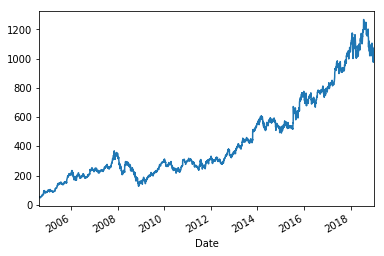

In [147]:
data['Close'].plot()

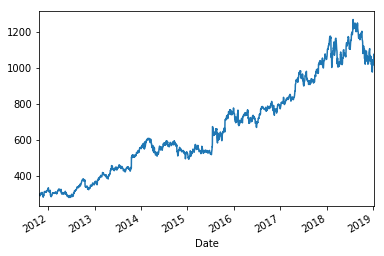

In [148]:
test.plot()

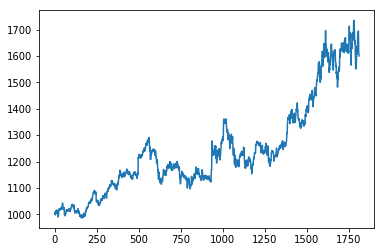

In [149]:
pyplot.plot(solde_list)

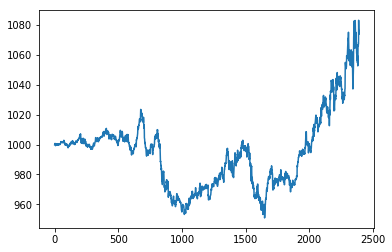

In [138]:
pyplot.plot(solde_list)

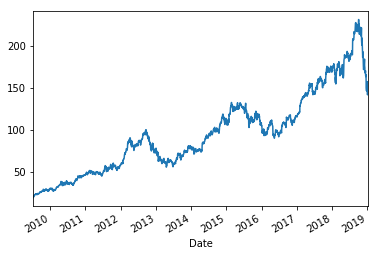

In [139]:
test.plot()

In [11]:
# Evaluate ARILA model

def evaluate_arima_model(dataset,arima_order):
    # prepare training dataset
    train_size = int(len(dataset) * 0.50)
    train ,test = dataset[:train_size], dataset[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # Report rmse
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# Evaluate combinaison of p,d and q values for an arima model

import warnings

def evaluate_models(dataset,p_values,d_values,q_values):
    best_rmse, best_cfg = float("inf"), None
    for p in range(p_values):
        for d in range(d_values):
            for q in range(q_values):
                order = (p,d,q)
                try:    
                    rmse = evaluate_arima_model(dataset,order)
                    if rmse < best_rmse:
                        best_rmse, best_cfg = rmse, order
                    print("ARIMA%s , RMSE : %.3f" %(order,rmse))
                except:
                    continue
    print("Best ARIMA%s , RMSE : %.3f" %(best_cfg,best_rmse))

p_values = 13
d_values = 4
q_values = 13

warnings.filterwarnings("ignore")
evaluate_models(data['Close'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) , RMSE : 78.746
ARIMA(0, 0, 1) , RMSE : 39.879
ARIMA(0, 1, 0) , RMSE : 1.684
ARIMA(0, 1, 1) , RMSE : 1.685
ARIMA(0, 1, 2) , RMSE : 1.685
ARIMA(0, 1, 3) , RMSE : 1.686
ARIMA(0, 1, 4) , RMSE : 1.688
ARIMA(0, 1, 5) , RMSE : 1.689
ARIMA(0, 1, 6) , RMSE : 1.691
ARIMA(0, 1, 7) , RMSE : 1.688


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1295ce5c0>],
      dtype=object)

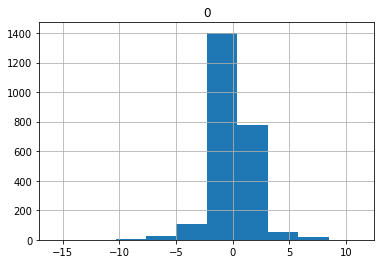

In [61]:
# Load Data
X = data['Close']
train_size = int(len(X) * 0.50)
train, test = X[:train_size], X[train_size:]
history = [x for x in train]

# ARIMA Model
predictions = list()
for i in range(len(test)):
    # Predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Observation
    obs = test[i]
    history.append(obs)
    
    
# Errors
residuals = [test[i] - predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.hist(ax=pyplot.gca())    


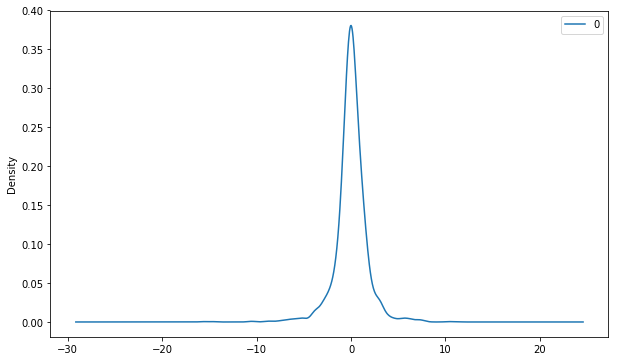

In [62]:
residuals.plot(kind='kde',ax=pyplot.gca(),figsize=(10,6))

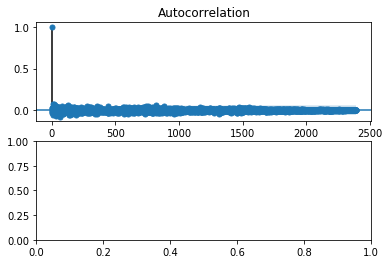

In [63]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
#plot_pacf(residuals, ax=pyplot.gca())

### Finalyze Model

In [64]:
X = data['Close'].values

# Fit model
model = ARIMA(X, order=(0,1,2))
model_fit = model.fit(disp=0)
model_fit.save('model.pkl')

In [65]:
from statsmodels.tsa.arima_model import ARIMAResults

model_fit = ARIMAResults.load('model.pkl')
predictions = model_fit.forecast()[0]
print("Predicted : %f3" % predictions)

Predicted : 150.8580663


In [66]:
data['Close'].tail(10)

Date
2018-12-24    146.830002
2018-12-26    157.169998
2018-12-27    156.149994
2018-12-28    156.229996
2018-12-31    157.740005
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
Name: Close, dtype: float64

In [67]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,1,10)
data2 = web.DataReader("AAPL",'yahoo',start,end)

In [68]:
data2['Close'].tail(10)

Date
2018-12-27    156.149994
2018-12-28    156.229996
2018-12-31    157.740005
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
2019-01-09    153.309998
2019-01-10    153.800003
Name: Close, dtype: float64

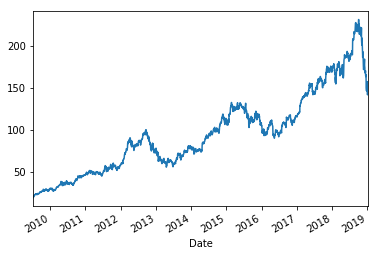

In [69]:
test.plot()

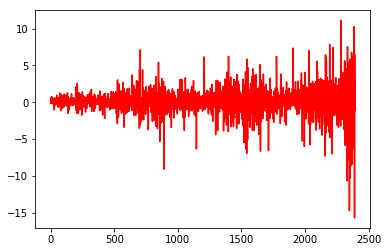

In [71]:
pyplot.plot(residuals, color='red')

for x in range(2): 
    for y in range(3):  
        model = ARIMA(train, order=(x,y,0))
        model_fit_list.append(model.fit(disp=0))
            #print(model_fit.summary())

import math
from sklearn.metrics import mean_squared_error

print("model_fif_list : ",len(model_fit_list))

for x in range(len(model_fit_list)):
    #print(model_fit_list[x].predict(dynamic=True))
    prediction = model_fit_list[x].predict(start= 4000,end=4778)
    rmse = math.sqrt(mean_squared_error(test, prediction))
    print("rmse[",x,"] : ",rmse)

for x in range(len(model_fit_list)):
    model_fit_list[x].resid.iplot()
    
data['predict'] = model_fit_list[3].predict(start= 4000,end=4778)
data[['Close','predict']].iplot()

model = sm.tsa.statespace.SARIMAX(data['Close'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())
data['forecast'] = results.predict(start = 4350, end= 4600, dynamic= True)  
data[['Close','forecast']].iplot()

## Prediction with ARIMA Model

In [10]:
import quandl
import pandas as pd
import datetime as dt

from statsmodels.tsa.arima_model import ARIMAResults

In [23]:
#collapse="monthly"
start = dt.datetime(2010,1,1)
end = dt.datetime(2019,7,12) #dt.datetime.now()
df = web.DataReader("AAPL",'yahoo',start,end)

In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,201.240005
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,203.229996
2019-07-11,204.389999,201.710007,203.309998,201.750000,20191800.0,201.750000
2019-07-12,204.000000,202.199997,202.449997,203.300003,17595200.0,203.300003
2019-07-15,205.869995,204.000000,204.089996,205.210007,16937700.0,205.210007


In [24]:
def create_ARIMA_model(dataset):
    X = dataset['Close'].values
    model = ARIMA(X,order=(0,1,2))
    model_fit = model.fit(disp=0)
    model_fit.save('model.pkl')
    
    
def use_model():
    model_fit = ARIMAResults.load("model.pkl")
    predictions = model_fit.forecast()[0]
    return predictions

create_ARIMA_model(df)
predict = use_model()
print("Prediction : %f3" % predict)
    

Prediction : 203.4455853


In [20]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,204.410004
2019-07-05,205.080002,202.899994,203.350006,204.229996,17265500.0,204.229996
2019-07-08,201.399994,198.410004,200.809998,200.020004,25338600.0,200.020004
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,201.240005
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,203.229996


In [32]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2016,3,9)
quandl.ApiConfig.api_key = "sFHqMh8KUnPWatzi-xRC"
df2 = web.DataReader("AAPL",'yahoo',start,end,interval='d')

TypeError: DataReader() got an unexpected keyword argument 'interval'

In [33]:
web.DataReader()

NameError: name 'DataReader' is not defined

In [174]:
df2.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-03,101.709999,100.449997,100.580002,101.500000,36955700.0,96.013351
2016-03-04,103.750000,101.370003,102.370003,103.010002,46055100.0,97.441711
2016-03-07,102.830002,100.959999,102.389999,101.870003,35828900.0,96.363358
2016-03-08,101.760002,100.400002,100.779999,101.029999,31561900.0,95.568756
2016-03-09,101.580002,100.269997,101.309998,101.120003,27201700.0,95.653908


In [217]:
data = {'Date':[],'Close':[]}
df_w = pd.DataFrame(data)
df_w['Date'][4] = 0

In [237]:
date_list = list()
val_list = list()

In [238]:
moy = 0
j = 0
for i in range(len(df)):
    moy = moy + df['Close'][i]
    if (i % 7 == 0):
        date_list.append(df.index[i])
        val_list.append(moy/7)
        #df_x['Close'][j] = moy
        moy = 0
        
        

In [253]:
df_w['Close'] = val_list
df_w['Date'] = date_list
df_w = df_w.set_index('Date')

In [255]:
df_w.tail()

,Close
Date,
2016-01-13,98.957141
2016-01-25,98.180000
2016-02-03,96.014284
2016-02-12,94.654284
2016-02-24,96.390000


In [264]:
train_size = int(len(df_w) * 0.93)
train_size

540

In [282]:
train = df_w['Close'][:539]
test = df_w['Close'][539:]

In [283]:
predictions = list()
history = [x for x in train.values]
for i in range(len(test)):
    # Predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Observation
    obs = test[i]
    history.append(obs)
    print("Predicted : %.3f , Expected :%3.f" %(yhat,obs))

# Report rmse
rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE : ",rmse)

Predicted : 109.579 , Expected :112
Predicted : 112.406 , Expected :109
Predicted : 109.052 , Expected :109
Predicted : 109.459 , Expected :116
Predicted : 116.947 , Expected :122
Predicted : 123.030 , Expected :130
Predicted : 131.293 , Expected :129
Predicted : 129.113 , Expected :125
Predicted : 124.075 , Expected :127
Predicted : 126.946 , Expected :125
Predicted : 125.135 , Expected :126
Predicted : 126.755 , Expected :128
Predicted : 128.204 , Expected :129
Predicted : 129.014 , Expected :126
Predicted : 126.276 , Expected :130
Predicted : 131.053 , Expected :131
Predicted : 131.060 , Expected :128
Predicted : 127.631 , Expected :127
Predicted : 127.434 , Expected :126
Predicted : 126.197 , Expected :124
Predicted : 124.070 , Expected :128
Predicted : 128.666 , Expected :121
Predicted : 120.345 , Expected :116
Predicted : 114.668 , Expected :112
Predicted : 111.809 , Expected :110
Predicted : 110.138 , Expected :112
Predicted : 112.415 , Expected :115
Predicted : 115.435 , Expect

In [270]:
df_w['Close'][540]

109.09000069754464

In [276]:
df_w['Date'] = df_w.index
df_w['Date'][540]

Timestamp('2015-01-13 00:00:00')